In [60]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [61]:
myyear = 2015
mymonth  = 1
myday = 1
myhour = 13
mymin = 10
mysec = 56
mydate = datetime(myyear, mymonth, myday)
mydate

datetime.datetime(2015, 1, 1, 0, 0)

In [62]:
#Set var = datetime(......) format is year, month, day, hour, min, sec
mydatetime = datetime(myyear, mymonth, myday, myhour, mymin, mysec)
#var.year will present year
mydatetime.year

2015

In [63]:
myseries = pd.Series(['Nov 3, 1990', '2001-01-01', None])
myseries

0    Nov 3, 1990
1     2001-01-01
2           None
dtype: object

In [64]:
#to_datetime = adjsut all string that might contain dates to one
newser = pd.to_datetime(myseries, format='mixed', errors='coerce')
newser

0   1990-11-03
1   2001-01-01
2          NaT
dtype: datetime64[ns]

In [65]:
sales = pd.read_csv('./data/RetailSales_BeerWineLiquor.csv')
sales

,DATE,MRTSSM4453USN
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822
...,...,...
335,2019-12-01,6630
336,2020-01-01,4388
337,2020-02-01,4533
338,2020-03-01,5562


In [66]:
sales['DATE'] = pd.to_datetime(sales['DATE'])
sales['DATE']

0     1992-01-01
1     1992-02-01
2     1992-03-01
3     1992-04-01
4     1992-05-01
         ...    
335   2019-12-01
336   2020-01-01
337   2020-02-01
338   2020-03-01
339   2020-04-01
Name: DATE, Length: 340, dtype: datetime64[ns]

In [67]:
#USE PARSE_DATES TO MAKE DATETIME FAST
sales = pd.read_csv('./data/RetailSales_BeerWineLiquor.csv', parse_dates=['DATE'])
sales = sales.set_index('DATE')
sales

,MRTSSM4453USN
DATE,
1992-01-01,1509
1992-02-01,1541
1992-03-01,1597
1992-04-01,1675
1992-05-01,1822
...,...
2019-12-01,6630
2020-01-01,4388
2020-02-01,4533


In [68]:
sales.resample(rule='YE').mean().round(2)

,MRTSSM4453USN
DATE,
1992-12-31,1807.25
1993-12-31,1794.83
1994-12-31,1841.75
1995-12-31,1833.92
1996-12-31,1929.75
1997-12-31,2006.75
1998-12-31,2115.17
1999-12-31,2206.33
2000-12-31,2375.58


Visualization

In [69]:
fb_data = pd.read_csv('./data/stock/FB.csv', parse_dates=['Date'])
fb_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-09-06,126.669998,129.940002,126.470001,129.729996,129.729996,26278400
1,2016-09-07,130.039993,131.979996,129.949997,131.050003,131.050003,27990800
2,2016-09-08,130.919998,131.080002,129.809998,130.270004,130.270004,15676600
3,2016-09-09,129.710007,129.949997,127.099998,127.099998,127.099998,27100700
4,2016-09-12,125.959999,128.759995,125.750000,128.690002,128.690002,21252800


<Axes: >

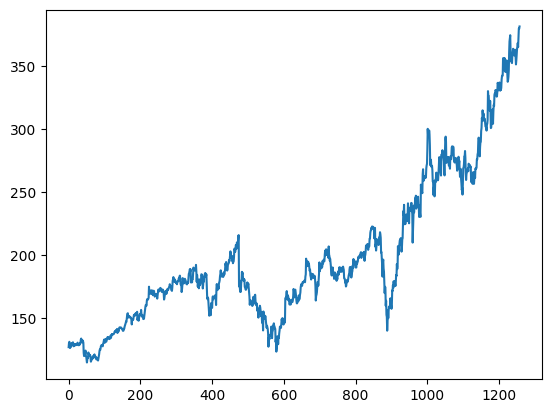

In [70]:
fb_data.Open.plot()

<Axes: >

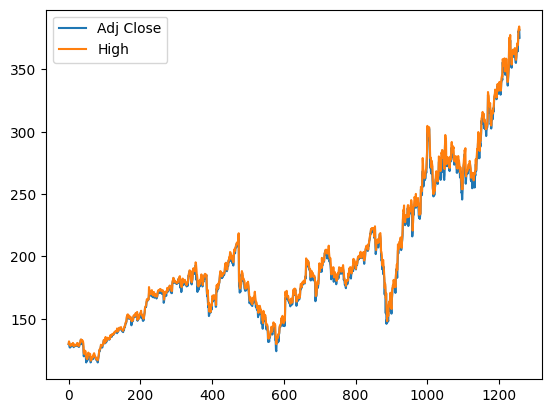

In [71]:
fb_data[['Adj Close', 'High']].plot()

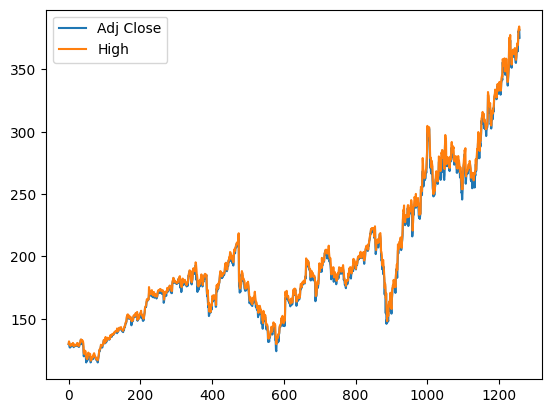

In [72]:
fb_data[['Adj Close', 'High']].plot(kind='line')
plt.show()

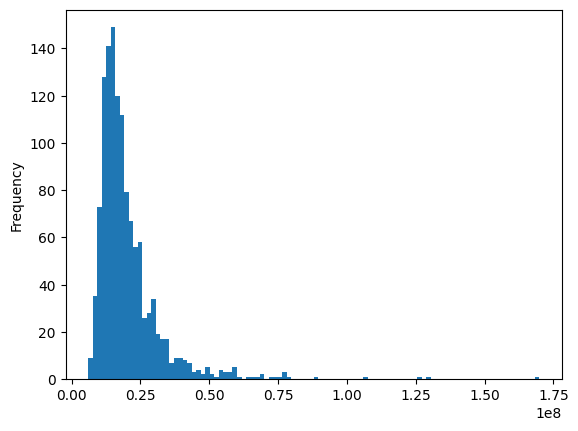

In [83]:
fb_data['Volume'].plot(kind='hist', bins=100)
plt.show()

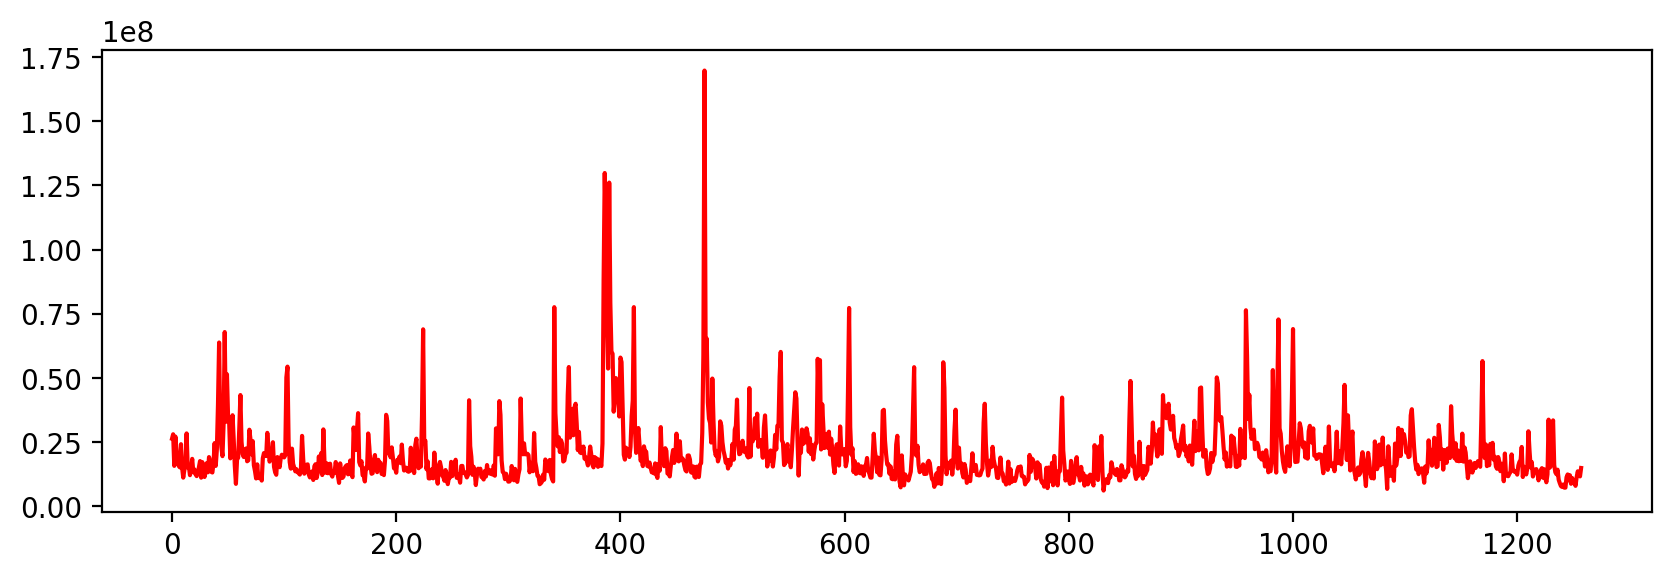

In [85]:
#Sharper DPI and PLT usage
plt.figure(figsize=(10,3), dpi=200)
fb_data['Volume'].plot(kind='line', c='red')
plt.show()

Two or more datframes for plotting

In [86]:
new_df = pd.read_csv('./data/stock/TGT.csv')

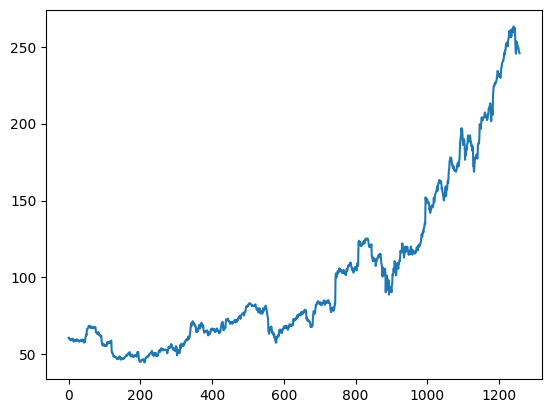

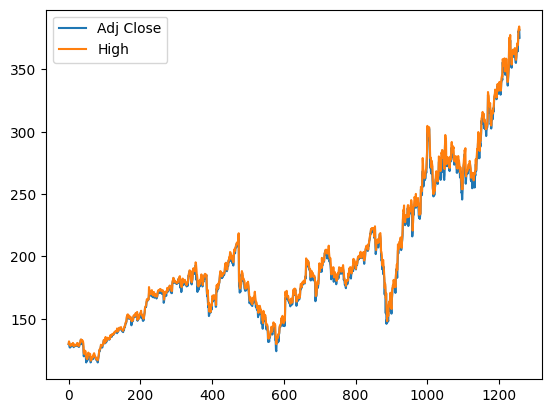

In [94]:
new_df['Adj Close'].plot(label='TGT')
fb_data[['Adj Close', 'High']].plot(label='FB Data')
plt.legend()

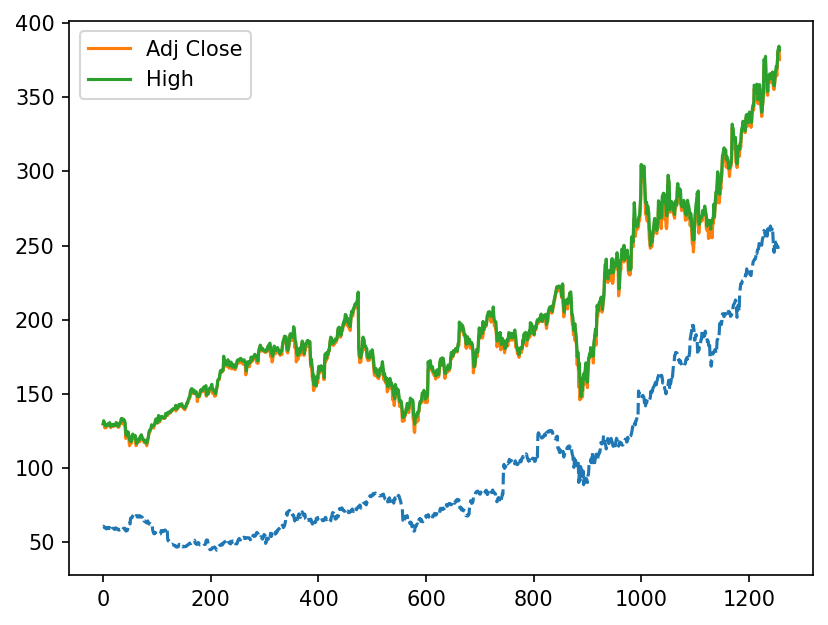

In [101]:
#Optimal version
fig, ax = plt.subplots(dpi=150)
new_df['Adj Close'].plot(ax=ax, ls='--')
fb_data[['Adj Close', 'High']].plot(ax=ax)
plt.show()

Timeseries plot

In [105]:
data = pd.read_csv('./data/stock/COST.csv', index_col='Date', parse_dates=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-06,158.130005,158.149994,156.020004,158.059998,140.896622,2716900
2016-09-07,157.639999,157.869995,155.399994,155.639999,138.739395,2984100
2016-09-08,155.190002,155.490005,152.940002,153.470001,136.805038,2993100
2016-09-09,152.589996,152.789993,150.699997,150.699997,134.335831,2993900
2016-09-12,150.500000,151.990005,150.259995,151.690002,135.218338,2982400


<Axes: xlabel='Date'>

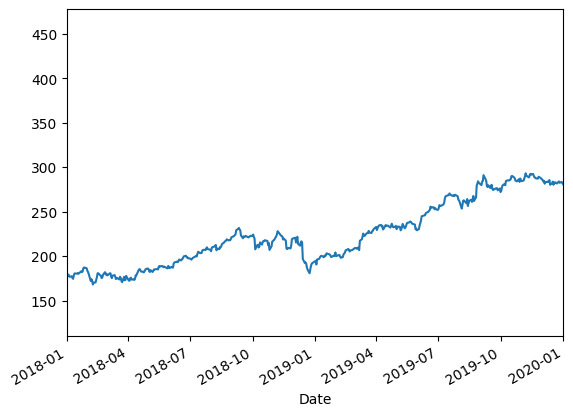

In [114]:
#xlim = limits only the x limites, so y will stay same.
data['Adj Close'].plot(xlim=['2018-01-01', '2020-01-01'])

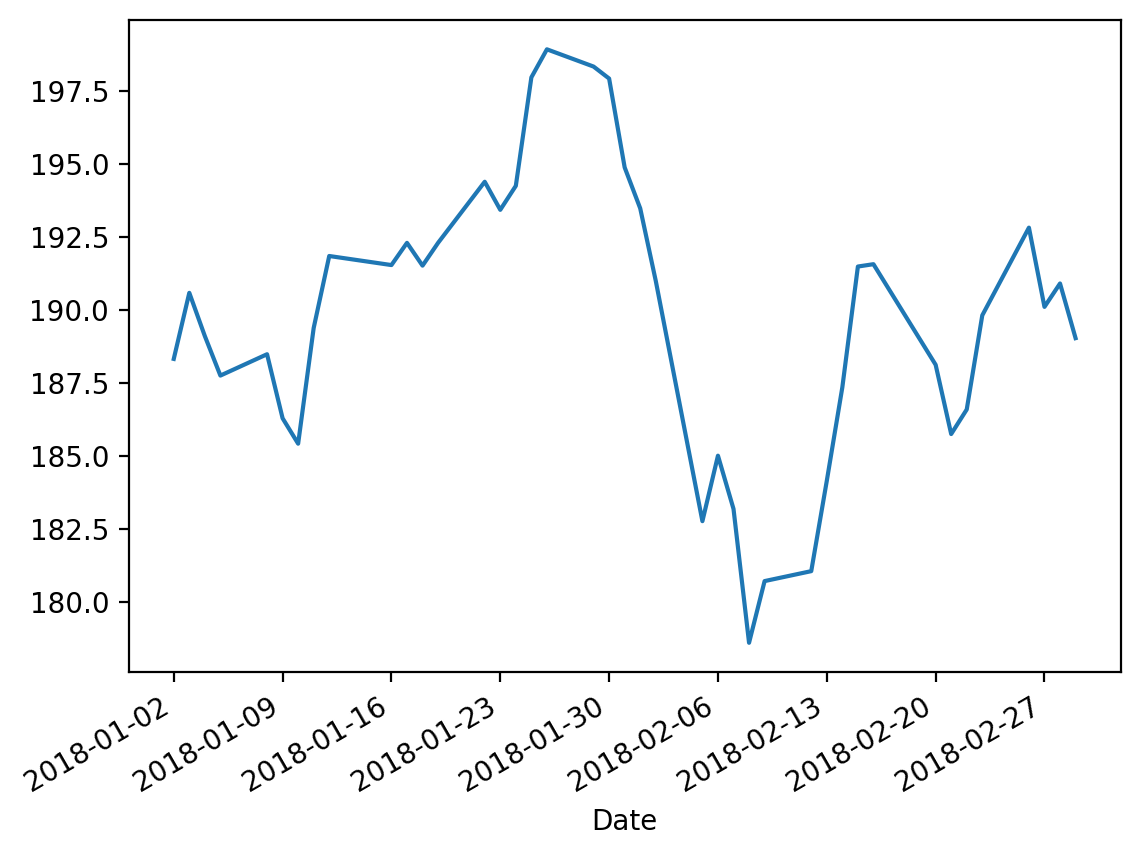

In [121]:
#Use dates for making graph better and avoid problem with dataframes in x axis
from matplotlib import dates
plt.figure(dpi=200)
ax = data.Close['2018-01-01':'2018-03-01'].plot()
ax.xaxis.set_major_locator(dates.WeekdayLocator())